# Conditional Probability Activity & Exercise

Below is some code to create some fake data on how much stuff people purchase given their age range.

It generates 100,000 random "people" and randomly assigns them as being in their 20's, 30's, 40's, 50's, 60's, or 70's.

It then assigns a lower probability for young people to buy stuff.

In the end, we have two Python dictionaries:

"totals" contains the total number of people in each age group.
"purchases" contains the total number of things purchased by people in each age group.
The grand total of purchases is in totalPurchases, and we know the total number of people is 100,000.

Let's run it and have a look:

In [1]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = float(ageDecade) / 100.0 # 年龄和购买非独立
    # purchaseProbability = 0.4 # 年龄和购买独立
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

我们可以通过可视化将数据的效果展示出来:

In [47]:
import matplotlib
matplotlib.rc("font",family='YouYuan')

plt.rcParams['axes.unicode_minus']=False # 否则会有报错：Glyph 8722 missing from current font.
plt.rcParams.update({"font.size": 14})

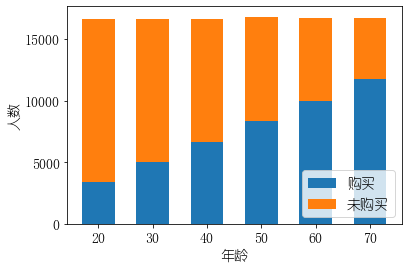

In [52]:
import matplotlib.pyplot as plt
import numpy as np
not_purchases = np.array(list(totals.values())) - np.array(list(purchases.values()))

plt.xlabel('年龄')
plt.ylabel('人数')
plt.bar(totals.keys(), purchases.values(), width=6)
plt.bar(totals.keys(), not_purchases, width=6, bottom = list(purchases.values()))
plt.legend(['购买', '未购买'], loc=4)
plt.savefig('./fig/conditional.png', format='png')
plt.show()

接下来我们看些数据，做些计算，已验证一些结论：

In [41]:
totals

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [42]:
purchases

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [43]:
totalPurchases

45012

Let's play with conditional probability.

First let's **compute P(E|F), where E is "purchase" and F is "you're in your 30's"**. The probability of someone in their 30's buying something is just the percentage of how many 30-year-olds bought something:

In [44]:
PEF = float(purchases[30]) / float(totals[30])
print('P(purchase | 30s): ' + str(PEF))

P(purchase | 30s): 0.29929598652145134


P(F) is just the probability of being 30 in this data set:

In [45]:
PF = float(totals[30]) / 100000.0
print("P(30's): " +  str(PF))

P(30's): 0.16619


And P(E) is the overall probability of buying something, regardless of your age:

In [46]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.45012


If E and F were independent, then **we would expect P(E | F) to be about the same as P(E). But they're not**; PE is 0.45, and P(E|F) is 0.3. So, that tells us that E and F are dependent (which we know they are in this example.)

What is P(E)P(F)?

In [47]:
print("P(30's)P(Purchase)" + str(PE * PF))

P(30's)P(Purchase)0.07480544280000001


P(E,F) is different from P(E|F). P(E,F) would be the probability of both being in your 30's and buying something, out of the total population - not just the population of people in their 30's:

In [48]:
print("P(30's, Purchase)" + str(float(purchases[30]) / 100000.0))

P(30's, Purchase)0.04974


**P(E,F) != P(E)P(F)**, because E and F are actually dependent on each other. If E and F are independent, P(E,F) = P(E)P(F).

We can also check that **P(E|F) = P(E,F)/P(F)** and sure enough, it is:

In [49]:
print((purchases[30] / 100000.0) / PF)

0.29929598652145134


所以，当两个变量相关时：

- P(E|F) != P(E)
- P(E,F) != P(E)P(F)
- but P(E|F) = P(E,F) / P(F)

## Your Assignment

Modify the code above such that the purchase probability does NOT vary with age, making E and F actually independent.

Then, confirm that P(E|F) is about the same as P(E), showing that the conditional probability of purchase for a given age is not any different than the a-priori probability of purchase regardless of age.


First we'll modify the code to have some fixed purchase probability regardless of age, say 40%:

In [55]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = 0.4
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

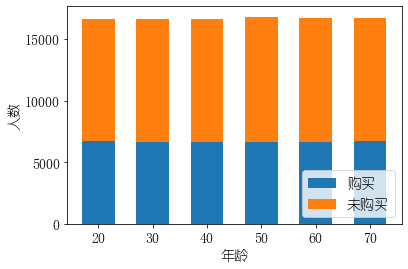

In [56]:
import matplotlib.pyplot as plt
import numpy as np
not_purchases = np.array(list(totals.values())) - np.array(list(purchases.values()))

plt.xlabel('年龄')
plt.ylabel('人数')
plt.bar(totals.keys(), purchases.values(), width=6)
plt.bar(totals.keys(), not_purchases, width=6, bottom = list(purchases.values()))
plt.legend(['购买', '未购买'], loc=4)
plt.savefig('./fig/conditional.png', format='png')
plt.show()

Next we will compute P(E|F) for some age group, let's pick 30 year olds again:

In [57]:
PEF = float(purchases[30]) / float(totals[30])
print("P(purchase | 30s): " + str(PEF))

P(purchase | 30s): 0.3987604549010169


Now we'll compute P(E)

In [4]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.4003


**P(E|F) is pretty darn close to P(E)**, so we can say that E and F are likely indepedent variables.

接着，我们证明当变量独立时，**P(E,F) = P(E) * P(F)**:

In [7]:
PF = totals[30] / 100000
print("P(30s): " + str(PF))

P(30s): 0.16619


In [11]:
print("P(Purchase & 30s): " + str(float(purchases[30] / 100000)))

P(Purchase & 30s): 0.06627


In [10]:
print("P(Purchase) * P(30s): " + str(PE * PF))

P(Purchase) * P(30s): 0.066525857


最后，我们证明**P(E|F) = P(E,F) / P(F)**依然成立：

In [18]:
print("P(purchase | 30s): " + str(PEF)) # left
print("P(Purchase & 30s): " + str(float(purchases[30] / 100000)))
print("P(30s): " + str(PF))

print("P(Purchase & 30s) / P(30s): " + str( float(purchases[30] / 100000) / PF )) # right

P(purchase | 30s): 0.3987604549010169
P(Purchase & 30s): 0.06627
P(30s): 0.16619
P(Purchase & 30s) / P(30s): 0.39876045490101686


## 总结

然后我们做下总结：
1. P(E|F) == P(E,F) / P(F)
2. 当E、F不相关时，P(E|F) == P(E)
3. 当E、F不相关时，P(E,F) == P(E)*P(F)